**Import all the required libraries**

In [156]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset for analysis**

In [157]:
# Importing Dataset
df = pd.read_csv('salary_data.csv')

**Different methods utilized for cleaning the data**

In [158]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [159]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [161]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [162]:
df.fillna(0,inplace=True)

In [163]:
df.isnull().values.any()

False

In [164]:
df.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [165]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [166]:
df.drop_duplicates(inplace=True,keep=False)

In [167]:
df['salary'] = df['salary'].astype('string') 

**Replace *'>50K'* with 1 and *'<=50K*' with 0**

In [168]:
l=df['salary'].tolist()
l1=[]

for i in range(0,len(l)):
  if l[i]==" <=50K":
    l1.append(0)
  else:
    l1.append(1)

df['Emp_Salary']=l1
print(l1)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

In [169]:
df=df.drop('salary',axis=1)

In [170]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Emp_Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [171]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,Emp_Salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [172]:
df=df.drop(['workclass','education','marital-status','occupation','relationship','race','sex','country'],axis=1)

In [173]:
correlation=df.corr()
print(correlation)

                     age    fnlwgt  ...  hours-per-week  Emp_Salary
age             1.000000 -0.076249  ...        0.068273    0.234050
fnlwgt         -0.076249  1.000000  ...       -0.019028   -0.009543
education-num   0.036010 -0.043582  ...        0.148703    0.335391
capital-gain    0.077681  0.000425  ...        0.078407    0.223346
capital-loss    0.057722 -0.010269  ...        0.054202    0.150478
hours-per-week  0.068273 -0.019028  ...        1.000000    0.229627
Emp_Salary      0.234050 -0.009543  ...        0.229627    1.000000

[7 rows x 7 columns]


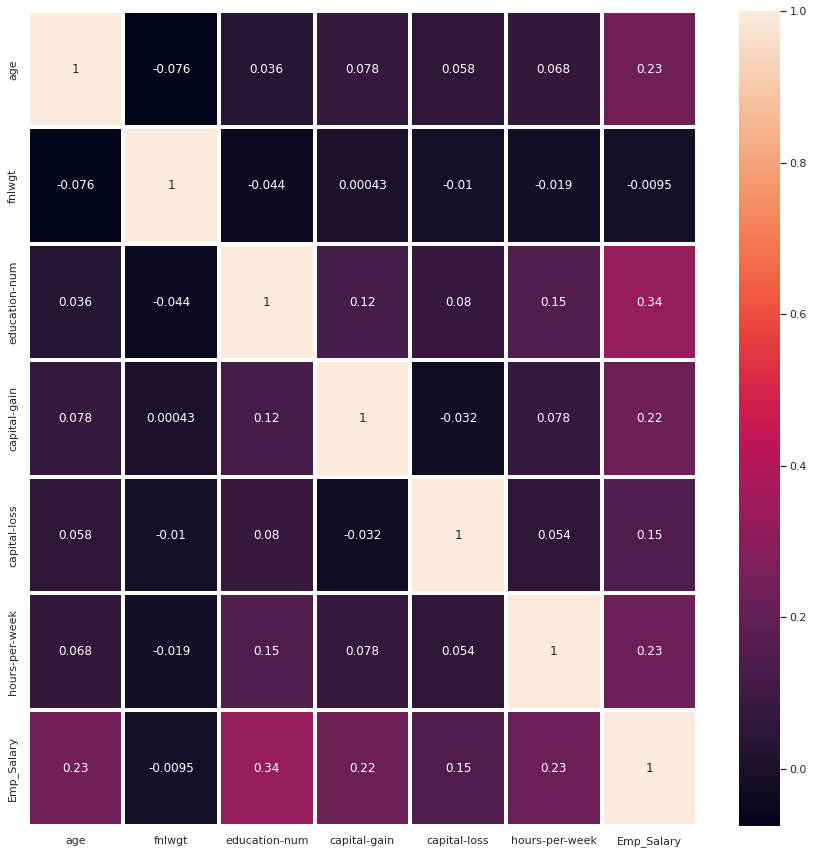

In [174]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(correlation, annot=True,linewidths=3, xticklabels=correlation.columns, 
 yticklabels=correlation.columns, linecolor='white', cbar=True)

In [175]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Emp_Salary
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


**Logistic Regression Classification Model for predicting the Salary**

In [176]:
# input
x = df.iloc[:, [0,1,2,3,4,5]].values
 
# output
y = df.iloc[:, 6].values

In [177]:
print(x)

[[    39  77516     13   2174      0     40]
 [    50  83311     13      0      0     13]
 [    38 215646      9      0      0     40]
 ...
 [    58 151910      9      0      0     40]
 [    22 201490      9      0      0     20]
 [    52 287927      9  15024      0     40]]


In [178]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.1, random_state = 0,shuffle=True)

In [179]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
 
print (xtrain[0:10, :])

[[ 0.03234377 -0.05266926 -1.19831444 -0.14528858 -0.21431269 -0.03394937]
 [-1.51053099 -0.38844154 -0.42013672 -0.14528858 -0.21431269 -1.01117037]
 [-0.04112645  0.31740509  1.52530758 -0.14528858 -0.21431269 -0.03394937]
 [ 0.91398649  0.51038615 -1.5874033  -0.14528858 -0.21431269 -0.03394937]
 [-0.55541804 -0.74887347 -0.42013672  0.45452045 -0.21431269 -0.03394937]
 [ 0.76704604  0.59032653 -0.03104786 -0.14528858 -0.21431269 -0.03394937]
 [-0.11459668  0.10831862 -0.42013672 -0.14528858 -0.21431269 -0.27825462]
 [ 0.62010559 -0.00540338 -1.19831444 -0.14528858  3.51342849  1.43188212]
 [-1.21665008  0.36701771 -0.42013672 -0.14528858 -0.21431269 -1.66265104]
 [-1.51053099  0.11347576 -1.19831444 -0.14528858 -0.21431269 -2.96561237]]


In [180]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [181]:
y_pred = classifier.predict(xtest)

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2303  148]
 [ 463  338]]


In [183]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(ytest, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(ytest, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(ytest, y_pred), ": is the f1 score")

[[2303  148]
 [ 463  338]] : is the confusion matrix 

0.8121156211562116 : is the accuracy score
0.6954732510288066 : is the precision score
0.42197253433208487 : is the recall score
0.5252525252525252 : is the f1 score


**Perform Exploratory Data Analysis for the given dataset**



<Figure size 936x936 with 0 Axes>

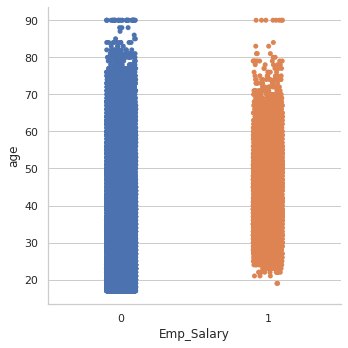

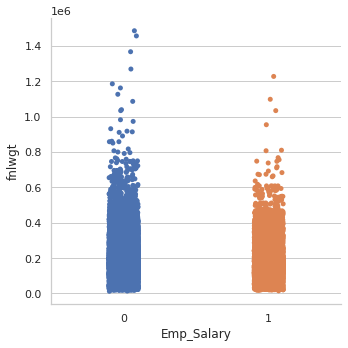

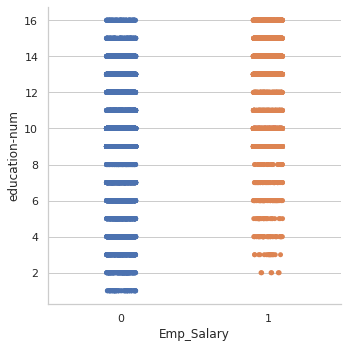

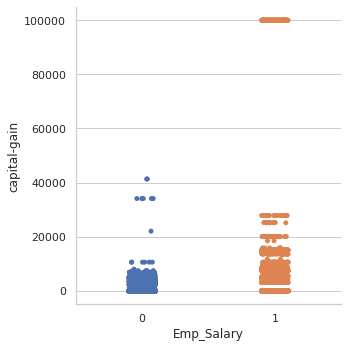

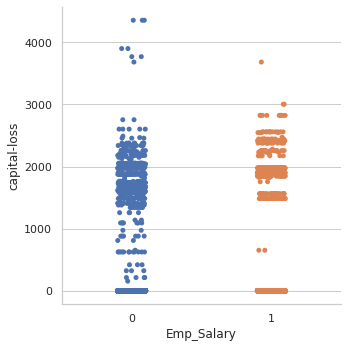

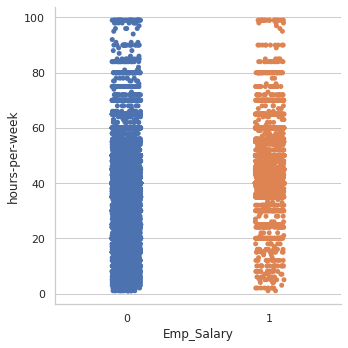

In [184]:
plt.figure(figsize=(13,13))
sns.set_theme(style='whitegrid')

sns.catplot(data=df,x="Emp_Salary", y="age")

sns.catplot(data=df,x="Emp_Salary", y="fnlwgt")

sns.catplot(data=df,x="Emp_Salary", y="education-num")

sns.catplot(data=df,x="Emp_Salary", y="capital-gain")

sns.catplot(data=df,x="Emp_Salary", y="capital-loss")

sns.catplot(data=df,x="Emp_Salary", y="hours-per-week")

<Figure size 936x936 with 0 Axes>

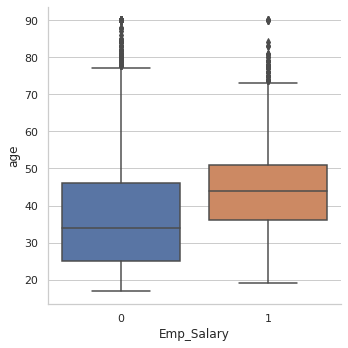

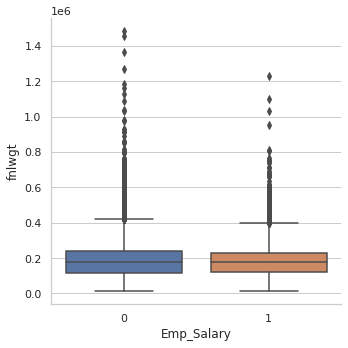

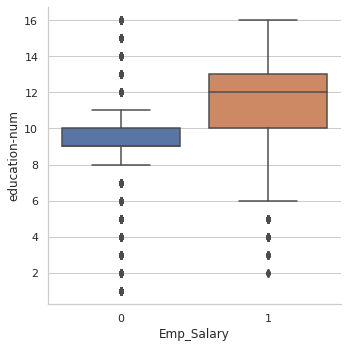

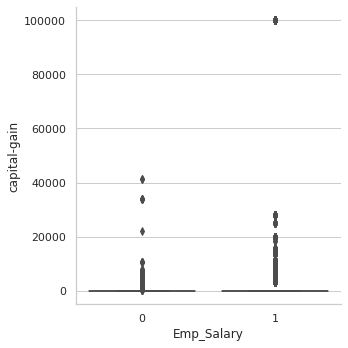

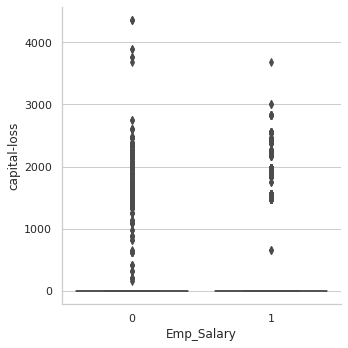

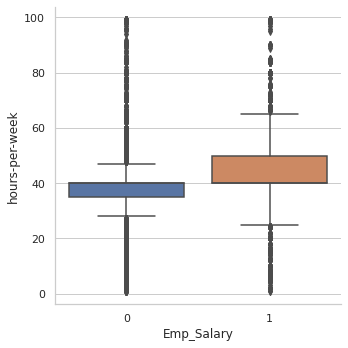

In [185]:
plt.figure(figsize=(13,13))
sns.set_theme(style='whitegrid')

sns.catplot(data=df,x="Emp_Salary", y="age",kind="box")

sns.catplot(data=df,x="Emp_Salary", y="fnlwgt",kind="box")

sns.catplot(data=df,x="Emp_Salary", y="education-num",kind="box")

sns.catplot(data=df,x="Emp_Salary", y="capital-gain",kind="box")

sns.catplot(data=df,x="Emp_Salary", y="capital-loss",kind="box")

sns.catplot(data=df,x="Emp_Salary", y="hours-per-week",kind="box")

<Figure size 936x936 with 0 Axes>

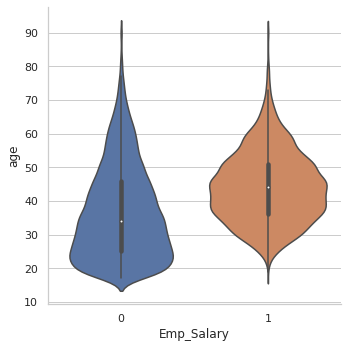

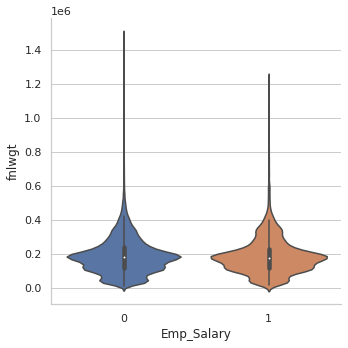

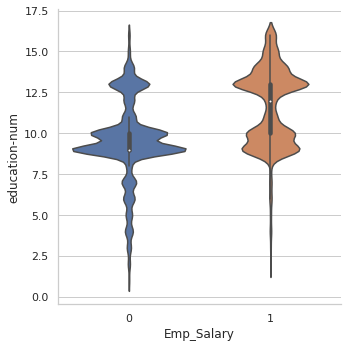

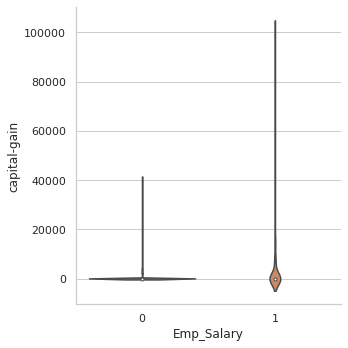

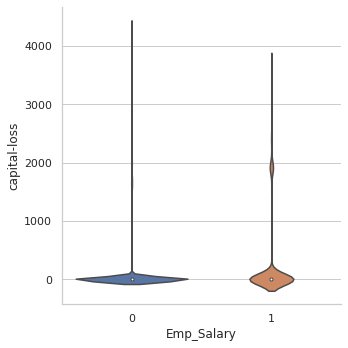

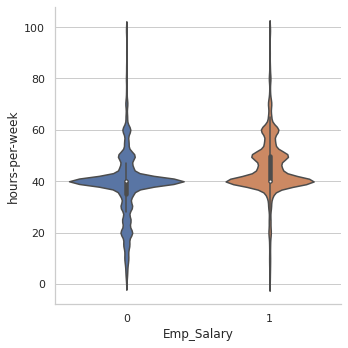

In [186]:
plt.figure(figsize=(13,13))
sns.set_theme(style='whitegrid')

sns.catplot(data=df,x="Emp_Salary", y="age",kind="violin")

sns.catplot(data=df,x="Emp_Salary", y="fnlwgt",kind="violin")

sns.catplot(data=df,x="Emp_Salary", y="education-num",kind="violin")

sns.catplot(data=df,x="Emp_Salary", y="capital-gain",kind="violin")

sns.catplot(data=df,x="Emp_Salary", y="capital-loss",kind="violin")

sns.catplot(data=df,x="Emp_Salary", y="hours-per-week",kind="violin")

<Figure size 936x936 with 0 Axes>

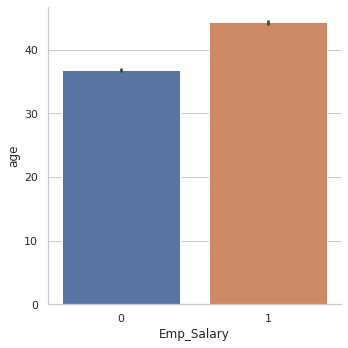

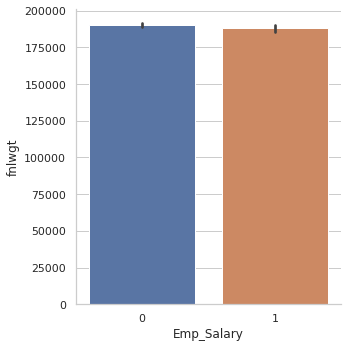

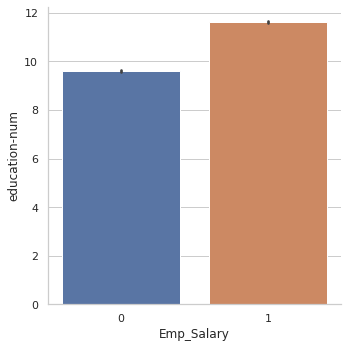

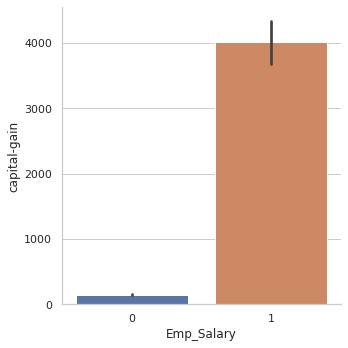

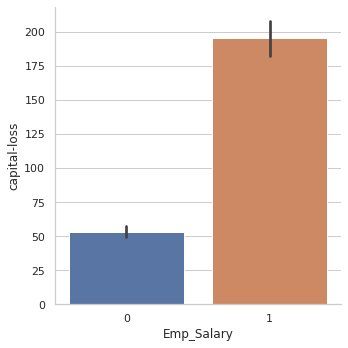

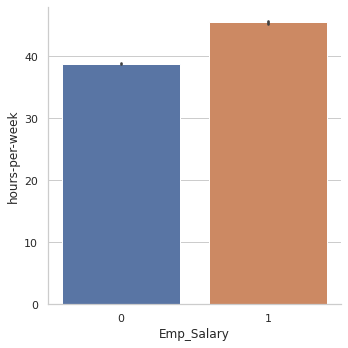

In [187]:
plt.figure(figsize=(13,13))
sns.set_theme(style='whitegrid')

sns.catplot(data=df,x="Emp_Salary", y="age",kind="bar")

sns.catplot(data=df,x="Emp_Salary", y="fnlwgt",kind="bar")

sns.catplot(data=df,x="Emp_Salary", y="education-num",kind="bar")

sns.catplot(data=df,x="Emp_Salary", y="capital-gain",kind="bar")

sns.catplot(data=df,x="Emp_Salary", y="capital-loss",kind="bar")

sns.catplot(data=df,x="Emp_Salary", y="hours-per-week",kind="bar")